In [1]:
import numpy as np
import matplotlib.pyplot as plt
from queue import Queue
import time
import random
import numba
import json

Text(0.5, 1.0, 'Maze_1')

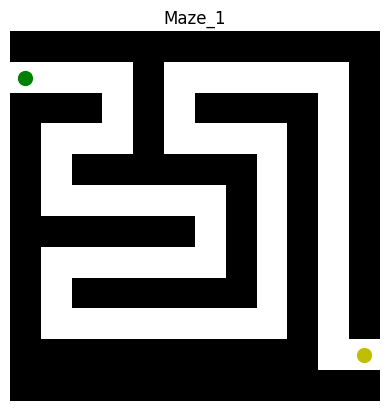

In [2]:
# Create the maze array (1 for walls, 0 for paths)
maze_1 = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1],
    [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1],
    [1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
    [1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
    [1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
])

rows, cols = 12, 12
start = (1, 0)
goal = (10, 11)

plt.imshow(maze_1, cmap = 'binary')

# Mark the start point (green)
start = (1, 0)
plt.plot(start[1], start[0], 'go', markersize=12, markeredgecolor='white')

# Mark the end point (yellow)
end = (10, 11)
plt.plot(end[1], end[0], 'yo', markersize=12, markeredgecolor='white')

plt.axis('off')

plt.title("Maze_1")

Text(0.5, 1.0, 'Maze_2')

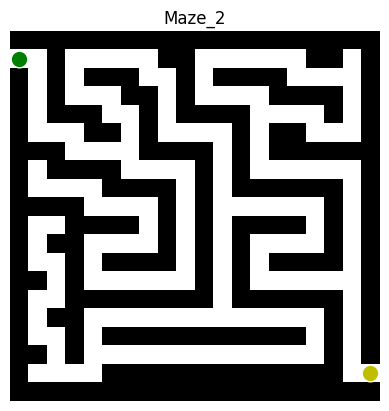

In [3]:
# Create the maze array (1 for walls, 0 for paths)
maze_2 = np.array([
    [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    [0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1],
    [1,0,1,0,1,1,1,0,0,1,0,1,1,1,1,0,0,0,0,1],
    [1,0,1,0,0,0,1,1,0,1,0,0,0,0,1,1,1,1,0,1],
    [1,0,1,1,1,0,0,1,0,1,1,1,1,0,0,0,0,1,0,1],
    [1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,1,0,0,0,1],
    [1,1,1,0,0,0,0,1,1,1,1,0,1,0,1,1,1,1,1,1],
    [1,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1],
    [1,0,0,0,0,1,1,1,1,0,1,0,1,1,1,1,1,1,0,1],
    [1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1],
    [1,0,0,1,1,1,1,0,1,0,1,0,1,1,1,1,0,1,0,1],
    [1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1],
    [1,0,0,1,0,1,1,1,1,0,1,0,1,0,1,1,1,1,0,1],
    [1,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1],
    [1,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1],
    [1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1],
    [1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1],
    [1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1],
    [1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0],
    [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
])

rows, cols = 20, 20
start = (1, 0)
end = (18, 19)

plt.imshow(maze_2, cmap = 'binary')

# Mark the start point (green)
start = (1, 0)
plt.plot(start[1], start[0], 'go', markersize=12, markeredgecolor='white')

# Mark the end point (yellow)
end = (18, 19)
plt.plot(end[1], end[0], 'yo', markersize=12, markeredgecolor='white')

plt.axis('off')

plt.title('Maze_2')

Text(0.5, 1.0, 'Maze_3')

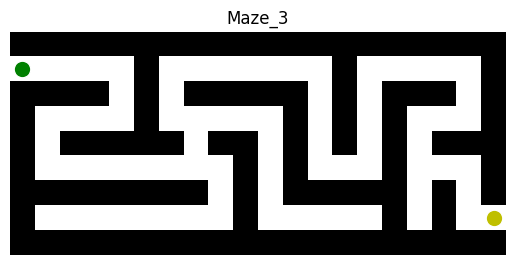

In [4]:
# Create the maze array (1 for walls, 0 for paths)
maze_3 = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1],
    [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1],
    [1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
])

rows, cols = 9, 20
start = (1, 0)
end = (7, 19)

plt.imshow(maze_3, cmap = 'binary')

# Mark the start point (green)
start = (1, 0)
plt.plot(start[1], start[0], 'go', markersize=12, markeredgecolor='white')

# Mark the end point (yellow)
end = (7, 19)
plt.plot(end[1], end[0], 'yo', markersize=12, markeredgecolor='white')

plt.axis('off')

plt.title('Maze_3')

In [18]:
@numba.jit(nopython=True)
def q_learning(maze, start, goal, episodes=10000, alpha=0.1, gamma=0.99, epsilon=0.1):

    """
    Perform Q-learning on the maze.

    Parameters:
    maze (numpy.ndarray): 2D array representing the maze
    start (tuple): Starting position (row, col)
    goal (tuple): Goal position (row, col)
    episodes (int): Number of episodes to run
    alpha (float): Learning rate
    gamma (float): Discount factor
    epsilon (float): Exploration rate

    Returns:
    dict: Q-table
    list: Path from start to goal
    int: Number of episodes needed to converge
    """
    
    rows, cols = maze.shape
    q_table = np.zeros((rows, cols, 4))
    actions = np.array([(0, 1), (1, 0), (0, -1), (-1, 0)])  # Right, Down, Left, Up

    for _ in range(episodes):
        state = start
        while state != goal:
            if np.random.random() < epsilon:
                action = np.random.choice(4)
            else:
                action = np.argmax(q_table[state[0], state[1]])
            
            next_state = (state[0] + actions[action][0], state[1] + actions[action][1])
            
            if 0 <= next_state[0] < rows and 0 <= next_state[1] < cols and maze[next_state] == 0:
                reward = 10 if next_state == goal else -0.1
                q_table[state[0], state[1], action] += alpha * (reward + gamma * np.max(q_table[next_state[0], next_state[1]]) - q_table[state[0], state[1], action])
                state = next_state
            else:
                q_table[state[0], state[1], action] += alpha * (-1 - q_table[state[0], state[1], action])

    return q_table

@numba.jit(nopython=True)
def get_path(q_table, start, goal):
    path = [start]
    state = start
    actions = np.array([(0, 1), (1, 0), (0, -1), (-1, 0)])  # Right, Down, Left, Up
    
    while state != goal:
        action = np.argmax(q_table[state[0], state[1]])
        next_state = (state[0] + actions[action][0], state[1] + actions[action][1])
        path.append(next_state)
        state = next_state
        if len(path) > 100:  # Prevent infinite loop
            return None
    return path

In [7]:
def visualize_maze(maze, start, goal, path):
    """
    Visualize the maze, path, and explored nodes.
    
    Parameters:
    maze (numpy.ndarray): 2D array representing the maze
    start (tuple): Starting position (row, col)
    goal (tuple): Goal position (row, col)
    path (list): Path from start to goal
    explored (set): Set of explored nodes
    """
    # plt.figure(figsize=(10, 10))
    plt.imshow(maze, cmap='binary')
    
    # Plot path
    if path:
        path_r, path_c = zip(*path)
        plt.plot(path_c, path_r, color='red', linewidth=2, marker='o', markersize=6)
    
    # Mark start and goal
    plt.plot(start[1], start[0], 'go', markersize=12, label='Start')
    plt.plot(goal[1], goal[0], 'yo', markersize=12, label='Goal')

    plt.legend()
    plt.title('Maze Solution with Q-Learning')
    plt.axis('off')
    plt.show()

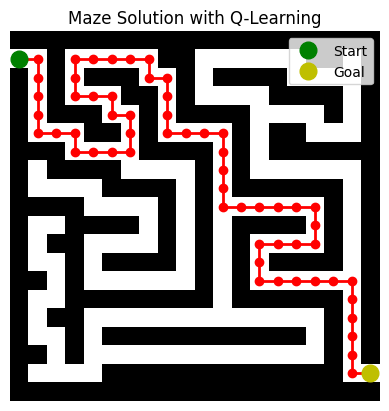

Q-Learning: Time = 6.4123s, Path Length = 59


In [8]:
rows, cols = 20, 20
start_2 = (1, 0)
goal_2 = (18, 19)

start_time = time.time()
q_table_2 = q_learning(maze_2, start_2, goal_2)
q_path_2 = get_path(q_table_2, start_2, goal_2)
q_time_2 = time.time() - start_time

visualize_maze(maze_2, start_2, goal_2, q_path_2)

print(f"Q-Learning: Time = {q_time_2:.4f}s, Path Length = {len(q_path_2) if q_path_2 else 'N/A'}")

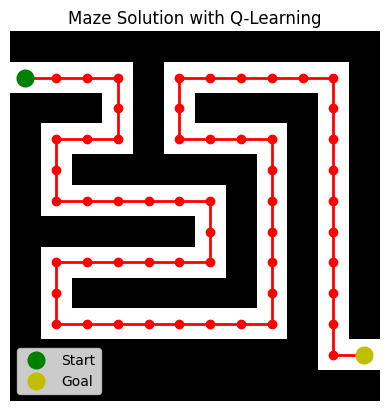

Q-Learning: Time = 0.2376s, Path Length = 57


In [10]:
rows, cols = 9, 20
start_1 = (1, 0)
goal_1 = (10, 11)

start_time = time.time()
q_table_1 = q_learning(maze_1, start_1, goal_1)
q_path_1 = get_path(q_table_1, start_1, goal_1)
q_time_1 = time.time() - start_time

visualize_maze(maze_1, start_1, goal_1, q_path_1)

print(f"Q-Learning: Time = {q_time_1:.4f}s, Path Length = {len(q_path_1) if q_path_1 else 'N/A'}")

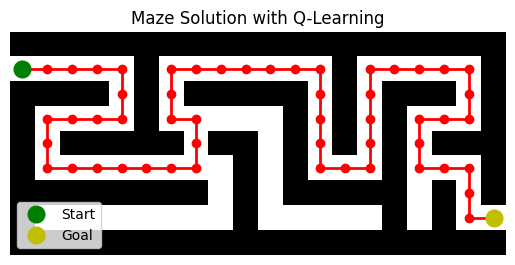

Q-Learning: Time = 0.2139s, Path Length = 54


In [11]:
rows, cols = 9, 20
start_3 = (1, 0)
goal_3 = (7, 19)

start_time = time.time()
q_table_3 = q_learning(maze_3, start_3, goal_3)
q_path_3 = get_path(q_table_3, start_3, goal_3)
q_time_3 = time.time() - start_time

visualize_maze(maze_3, start_3, goal_3, q_path_3)

print(f"Q-Learning: Time = {q_time_3:.4f}s, Path Length = {len(q_path_3) if q_path_3 else 'N/A'}")

In [17]:
def save_results(maze, start, goal, q_table, path, num):
    """
    Function to save the results in json file containing the q_table and q_path obtained from Q-Learning.

    Parameters:
    maze (numpy.ndarray): 2D array representing the maze
    start (tuple): Starting position (row, col)
    goal (tuple): Goal position (row, col)
    path (list): Path from start to goal
    """
    
    
    results = {
        "maze": maze.tolist(),
        "start": start,
        "goal": goal,
        "path": path,
        "qtable": q_table.tolist()
    }
    
    with open('q_learning_results_{}.json'.format(num), 'w') as f:
        json.dump(results, f)
    
    print("Results saved as 'q_learning_results_{}.json'".format(num))


In [14]:
save_results(maze_1, start_1, goal_1, q_table_1, q_path_1, 1)

Results saved as 'q_learning_results_1.json'


In [15]:
save_results(maze_2, start_2, goal_2, q_table_2, q_path_2, 2)

Results saved as 'q_learning_results_2.json'


In [16]:
save_results(maze_3, start_3, goal_3, q_table_3, q_path_3, 3)

Results saved as 'q_learning_results_3.json'
